<font size=6> Apoplast model\
<font size=5> Parameter test

In [3]:
# import Classes and helper functions
%run Helper_functions.ipynb
%run Classes.ipynb
%matplotlib inline

import scipy.stats as st
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Could not find RADAR5
Could not find GLIMDA


100.0000%               Variable:                      
Steady state reached at:       t=10
Lowest auxin concentration:    0.7975201862804329
no. auxin peaks:               10
avg. peak height:              2.234015261418201
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 0.7393366759873427
avg. peak height:              2.2129234840043495



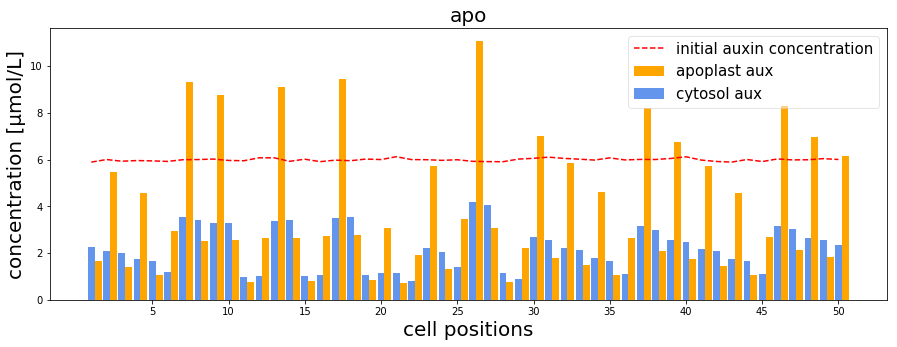

In [4]:
# model type
mode="apo"

# total cells
n=50

# neighbours per cell (2 for 1D)
k=2

# auxin and PIN initial base concentration
auxin=6
pin=40

# integration time
time=100000

# base auxin and pin with random noise
noise=.01

# initial distribution (seed for comparability)
np.random.seed(2020)

# auxin
aux = [auxin for i in range(n)] + np.random.normal(0,auxin*noise,n)
apo = [auxin for i in range(n)] + np.random.normal(0,auxin*noise,n)

# PINs (both sides)
pin_left = [pin for i in range(n)] + np.random.normal(0,pin*noise,n)
pin_right = [2*pin-x for x in pin_left] 

# initial values per cell
start=np.concatenate((aux, apo, pin_left, pin_right))

# periodic boundary condition
PBC=1

# class initiation
model=Mod1D_Apo(n,k,PBC)


# model parameter

# auxin degredation/synthesis rate to A
model.Ga=1 

# auxin base level of synthesis (steady state)
model.A=6

# auxin diffusion rate to equilibrium
model.Da=30.5 

# pin degredation/synthesis rate to p
model.Gp=2 

# pin base level of synthesis (steady state)
model.p=40 

# factor of regulatory function phi
model.m=4 

# pin efflux efficiency
model.Ep=1

# AUX carrier influx rate
model.q=10

# AUX influx efficiency
model.Eq=1

# apoplast-cytosol volume ratio
model.V=1


R0=model.intgr(time,start)
info(R0,n,"","",mode)
Show(mode,R0,n)
# print(model.sim(time,start))

<font size=5> Standard condition\
<font size=4> This will show the reference simulation conditions for this model.
Values for parameters and compartments are not evaluated and this model serves only as a representable simulation. Statistics doesn't consider apoplast concentrations.  
Detailed Information on classes and helper functions can be found in the associated [Gitlab-wiki]("https://gitlab.com/Fe_Ris/master-files/-/wikis/General).

<font size=5> Cell number

In [ ]:
mode="apo"
N=range(5,20,5)
Data_cn=[]

for i,n in enumerate(N):    
    start=initial(mode,n,auxin,pin,Noise=noise)
    model=Mod1D_Apo(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_cn.append(info(R,n,"n=",n,mode))
    Show(mode,R,n,title=["Fig 1.{}: n = ".format(i+1),n])
show_data(Data_cn,N,"N",mode=mode)

<font size=5> Initial Values

In [ ]:
mode="apo"
n=50
auxin=[1,5,10,20,50]
pin=[0,1,5,10,50,100]
Data_iva=[]
Data_ivp=[]

for i,a in enumerate(auxin):
    start=initial(mode,n,a,40,noise)
    model=Mod1D_Apo(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_iva.append(info(R,n,"auxin=",a,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 2a.{}: auxin = ".format(i),a))
show_data(Data_iva,auxin,"auxin")
    
for i,p in enumerate(pin):
    start=initial(mode,n,5,p,noise)
    model=Mod1D_Apo(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_ivp.append(info(R,n,"pin=",p,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 2b.{}: pin = ".format(i+1),p))
show_data(Data_ivp,pin,"pin")



<font size=5> Noise effect on initial auxin concentration

In [ ]:
mode="apo"
n=50
auxin=5
pin=40
noise=[0.01,0.05,0.1,0.2,0.5]
Data_noi=[]

for i,noi in enumerate(noise):
    start=initial(mode,n,auxin,pin,noi)
    model=Mod1D_Apo(n,k,PBC,progress=0)
    R=model.intgr(time,start)
    Data_noi.append(info(R,n,"noise=",noi,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 3.{}: noise = ".format(i+1),str(noi*100)+"%"))
show_data(Data_noi,noise,"noise (%)",mode=mode,everyx=10)

<font size=5> Boundary condition

In [ ]:
mode="apo"
n=50
auxin=5
pin=40
noise=0.01
pbc_modes=["cutoff","PBC","zero-flux"]
Data_bc=[]

for pbc in range(3):
    start=initial(mode,n,auxin,pin,noise)
    model=Mod1D_Apo(n,k,PBC=pbc,progress=0)
    R=model.intgr(time,start)
    Data_bc.append(info(R,n,pbc_modes[pbc]+"=",pbc,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 4.{}: ".format(pbc+1),pbc_modes[pbc]))

<font size=5> Parameter values

In [4]:
mode="apo"
np.random.seed(2020)
n=50
auxin=5
pin=40
noise=0.01
PBC=1
start=initial(mode,n,auxin,pin,noise)
model=Mod1D_Apo(n,k,PBC,progress=0)

<font size=4> *A* (auxin base level):

100.0000%               Variable:                      A=1
Steady state reached at:       t=9
Lowest auxin concentration:    0.13292003104673886
no. auxin peaks:               10
avg. peak height:              0.3723358769030337
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 0.12322277933122378
avg. peak height:              0.368820580667392



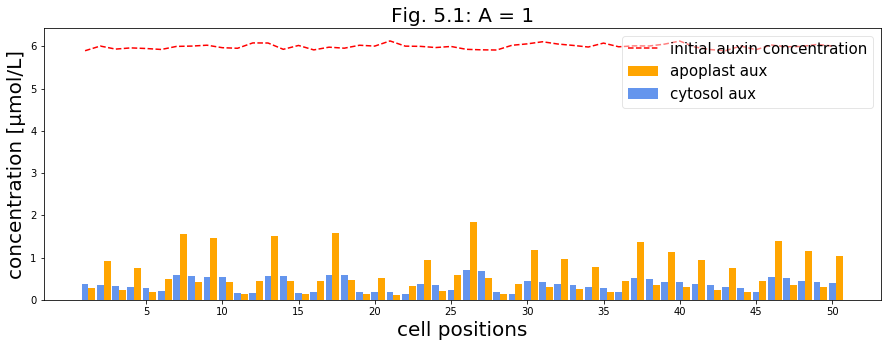

100.0000%               Variable:                      A=6
Steady state reached at:       t=10
Lowest auxin concentration:    0.7975201862804329
no. auxin peaks:               10
avg. peak height:              2.234015261418201
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 0.7393366759873427
avg. peak height:              2.2129234840043495



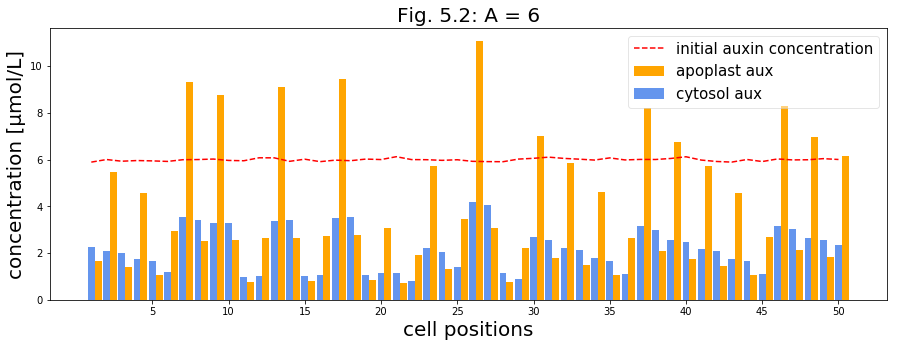

100.0000%               Variable:                      A=11
Steady state reached at:       t=10
Lowest auxin concentration:    1.4621203415141286
no. auxin peaks:               10
avg. peak height:              4.095694645933369
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 1.3554505726434631
avg. peak height:              4.057026387341311



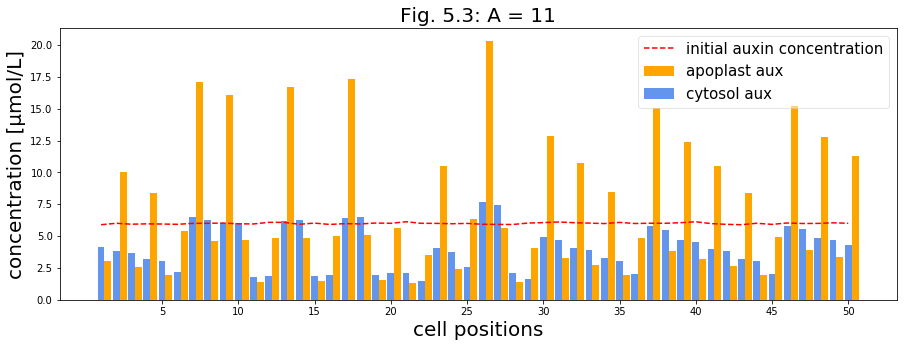

100.0000%               Variable:                      A=16
Steady state reached at:       t=11
Lowest auxin concentration:    2.1267204967478244
no. auxin peaks:               10
avg. peak height:              5.957374030448543
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 1.971564469299582
avg. peak height:              5.901129290678268



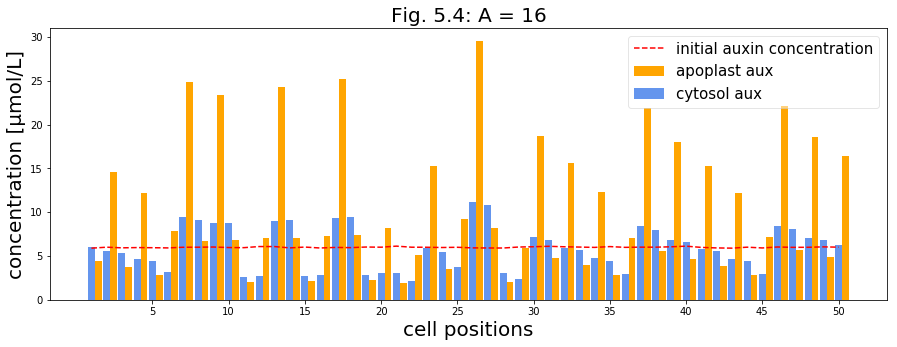

100.0000%               Variable:                      A=21
Steady state reached at:       t=11
Lowest auxin concentration:    2.7913206519815197
no. auxin peaks:               10
avg. peak height:              7.819053414963702
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 2.5876783659557008
avg. peak height:              7.7452321940152205



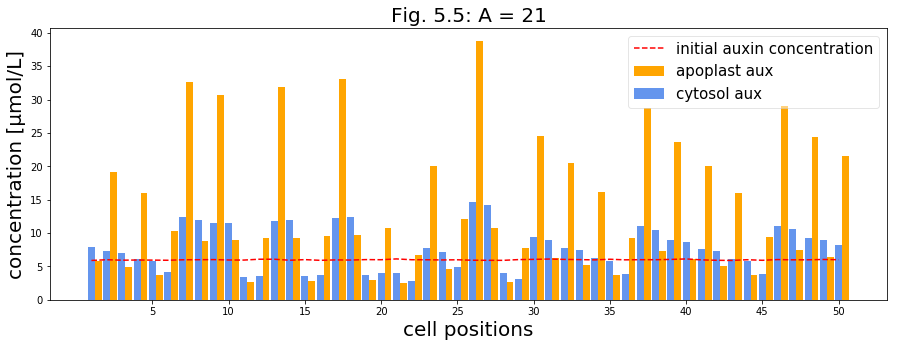

100.0000%               Variable:                      A=26
Steady state reached at:       t=12
Lowest auxin concentration:    3.455920807215206
no. auxin peaks:               10
avg. peak height:              9.680732799478864
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 3.203792262611839
avg. peak height:              9.589335097352173



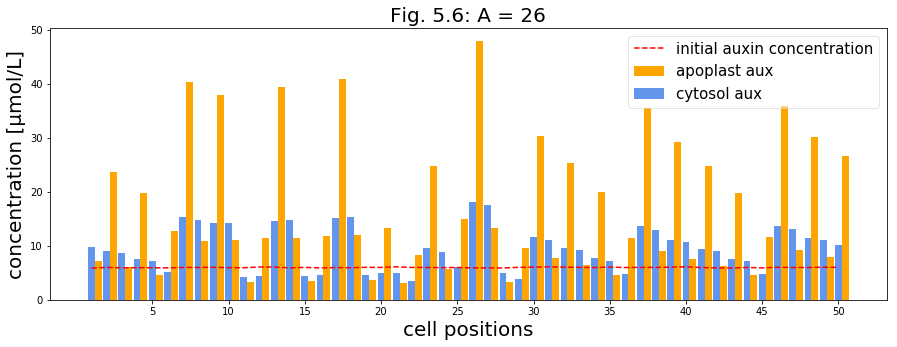

100.0000%               Variable:                      A=31
Steady state reached at:       t=12
Lowest auxin concentration:    4.120520962448903
no. auxin peaks:               10
avg. peak height:              11.54241218399404
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 3.8199061592679384
avg. peak height:              11.433438000689147



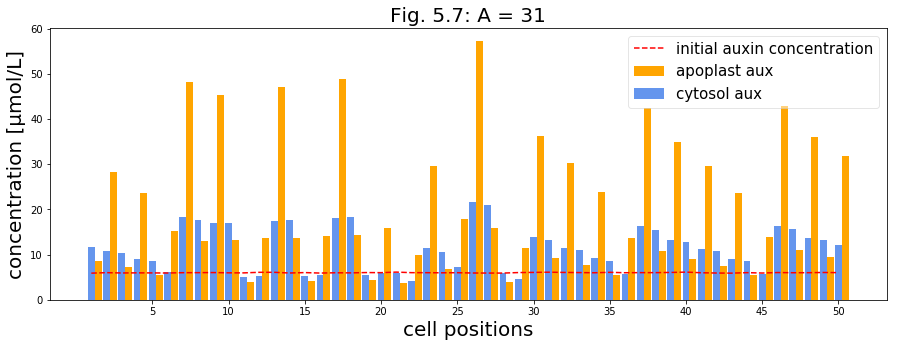

100.0000%               Variable:                      A=36
Steady state reached at:       t=12
Lowest auxin concentration:    4.78512111768274
no. auxin peaks:               10
avg. peak height:              13.40409156850933
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 4.4360200559009995
avg. peak height:              13.277540904023283



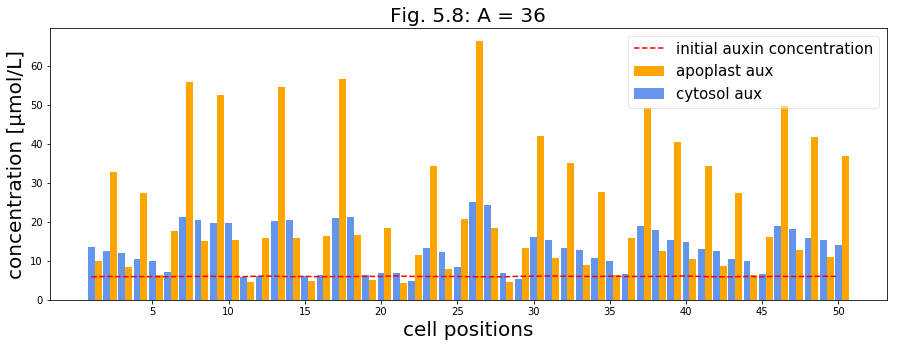

100.0000%               Variable:                      A=41
Steady state reached at:       t=13
Lowest auxin concentration:    5.449721272916311
no. auxin peaks:               10
avg. peak height:              15.265770953024406
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 5.052133952580185
avg. peak height:              15.121643807363078



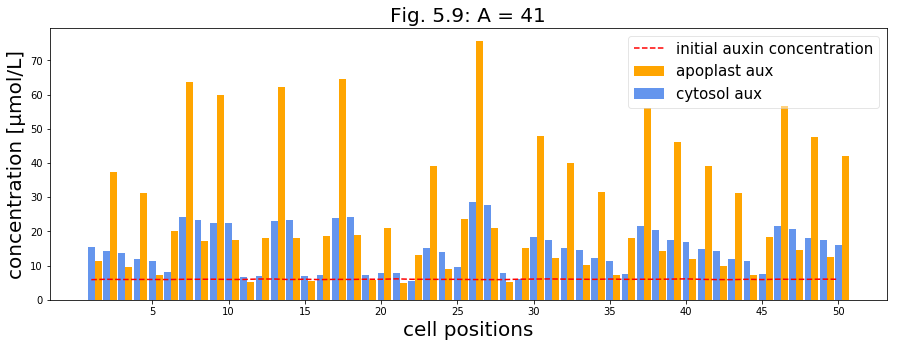

100.0000%               Variable:                      A=46
Steady state reached at:       t=13
Lowest auxin concentration:    6.114321428150004
no. auxin peaks:               10
avg. peak height:              17.127450337539564
avg. peak distance:            5.0
avg. peak width:               3.3333333333333335

no. apoplast peaks (over)    : 18
Lowest apoplast concentration: 5.668247849236312
avg. peak height:              16.965746710700028



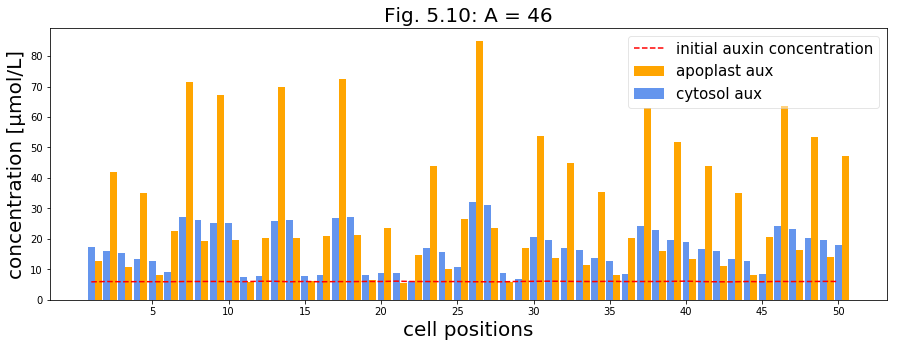

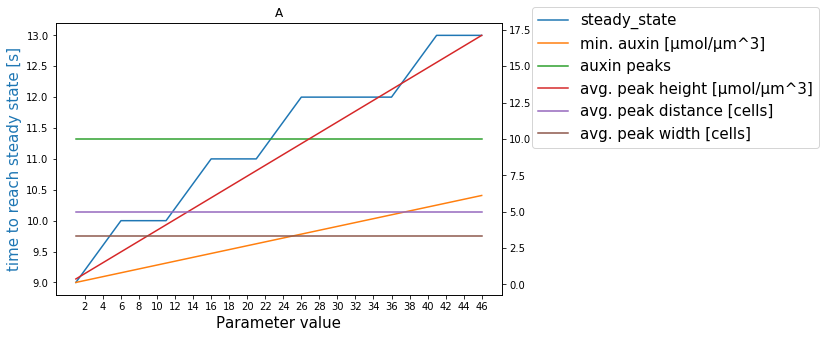

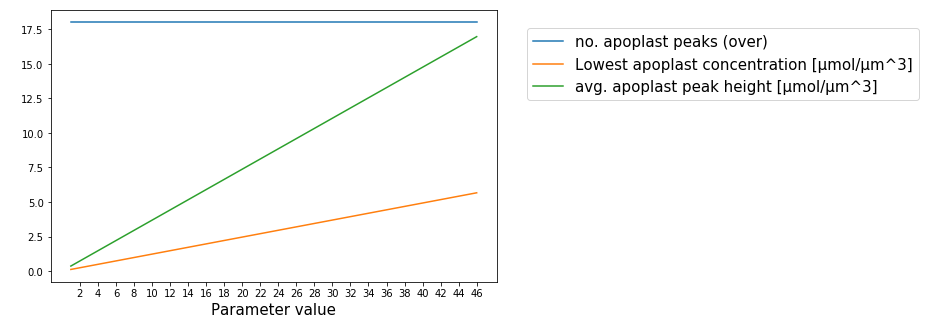

In [6]:
model.set_standard()
Data_A=[]
Data_R=[]
A=range(1,50,5)

for i,a in enumerate(A):
    model.A=a
    R=model.intgr(time,start)
    Data_R.append(R)
    Data_A.append(info(R,n,"A=",a,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 5.{}: A = ".format(i+1),a))
show_data(Data_A,A,"A",everyx=2,mode=mode)

In [ ]:
auxh=[np.array(Data_R)[i,-1,:n] for i in range(10)]
apoh=[np.array(Data_R)[i,-1,1:2*n] for i in range(10)]

plt.plot(range(1,50,5),auxh.flatten())



avg_apoh=[np.std(np.array(Data_R)[i,-1,1:2*n]) for i in range(10)]
#plt.plot(range(1,50,5),avg_apoh,label="apoplast")
#plt.plot(range(1,50,5),avg_auxh,label="cytosol")
#plt.title("")
#plt.xlabel("Parameter A",fontsize=15)
#plt.ylabel("standard deviation of auxin \n at steady state",fontsize=15)
#plt.legend(fontsize=15)
#plt.show()

slope_aux=np.average([y/x for x,y in zip(avg_auxh,range(1,50,5))])
slope_apo=np.average([y/x for x,y in zip(avg_apoh,range(1,50,5))])
print(slope_aux,avg_auxh)

<font size=4> *Ga* (auxin degredation/synthesis coefficient):

In [ ]:
mode="apo"
model.set_standard()
Data_Ga=[]
Ga=np.arange(0.05,2.55,.05)

for i,ga in enumerate(Ga):
    model.Ga=ga
    R=model.intgr(time,start)
    Data_Ga.append(info(R,n,"Ga=",ga,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 6.{}: Ga = ".format(i+1),ga),noplot=1)
    
show_data(Data_Ga,Ga,"Ga",everyx=20,mode=mode)

<font size=4> *Da* (diffusion coefficient)

In [ ]:
mode="apo"
model.set_standard()
Data_Da=[]
Da=range(0,121,10)

for i,da in enumerate(Da):
    model.Da=da
    R=model.intgr(time,start)
    Data_Da.append(info(R,n,"Da=",da,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 7.{}: Ga = ".format(i+1),da),noplot=1)
   
show_data(Data_Da,Da,"Da",everyx=5,mode=mode)

In [ ]:
# correlation between diffusion coefficient and min. auxin concentration (Dma_corr)
P_corr_dma=st.pearsonr(A,np.array(Data_A)[:,3])
print("Dma_Ph_corr: "+str(P_corr_dma[0]))

<font size=4> *Ep* (PIN efficiency)\
    (should be between 0 and 1; important coefficient to regulate PIN flux)

In [ ]:
mode="apo"
model.set_standard()
D_d_ep=[]
Data_Ep=[]
Ep=np.arange(0,1,.1)

for d in range(0,101,10):
    Data_Ep=[]
    model.Da=d
    for i,ep in enumerate(Ep):
        model.Ep=ep
        R=model.intgr(time,start)
        Data_Ep.append(info(R,n,"Ep,Da=",[ep,d],mode))
        Show(mode,R,n,yrange=0,title=("Fig. 8.{}: Ep,Da = ".format(i+1),[ep,d]),noplot=1)
    
    show_data(Data_Ep,Ep,"Ep",everyx=10,mode=mode)  
D_d_ep.append(Data_Ep)

In [ ]:
mode="apo"
model.set_standard()
Data_p=[]
Data_ap=[]
P=range(20,81,10)

for a in range(10,11):
    Data_p=[]
    model.A=a
    for i,p in enumerate(P): 
        model.p=p
        R=model.intgr(time,start)
        Data_p.append(info(R,n,"p=",p,mode))
        Show(mode,R,n,yrange=0,title=("Fig. 9.{}: p = ".format(i+1),p),noplot=1)
    show_data(Data_p,P,"p",mode=mode)
Data_ap.append(Data_p)

<font size=4> *Eq* (AUX efficiency)\
    (should be between 0 and 1)

In [ ]:
mode="apo"
model.set_standard()
Data_Eq=[]
Eq=np.arange(0,1.5,.1)

for i,eq in enumerate(Eq):
    model.Eq=eq
    R=model.intgr(time,start)
    Data_Eq.append(info(R,n,"Eq=",eq,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 7.{}: Eq = ".format(i+1),eq),noplot=1)
   
show_data(Data_Eq,Eq,"Eq",everyx=5,mode=mode)

- AUX transport has nearly no effect on simulations

<font size=4> *Gp* (PIN synthesis/degradation coefficient)

In [ ]:
mode="apo"
model.set_standard()
Data_Gp=[]
Gp=np.arange(.01,.52,.1)

for i,gp in enumerate(Gp):
    model.Gp=gp
    R=model.intgr(time,start)
    Data_Gp.append(info(R,n,"Gp=",gp,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 10.{}: Gp = ".format(i+1),gp),noplot=1)
show_data(Data_Gp,Gp,"Gp",mode=mode)

<font size=4> *m* (PIN regulation coefficient)

In [ ]:
mode="apo"
model.set_standard()
Data_m=[]
M=range(-3,3,1)#arange(3.6,3.71,.01)

for i,m in enumerate(M):
    model.m=m
    R=model.intgr(time,start)
    Data_m.append(info(R,n,"m=",m,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 11.{}: m = ".format(i+1),m),noplot=0)
show_data(Data_m,M,"m",everyx=1,mode=mode)

<font size=4> *q* (AUX concentration per membrane)

In [ ]:
mode="apo"
model.set_standard()
Data_q=[]
M=range(0,100,10)#arange(3.6,3.71,.01)

for i,q in enumerate(M):
    model.q=q
    R=model.intgr(time,start)
    Data_q.append(info(R,n,"q=",q,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 11.{}: q = ".format(i+1),q),noplot=0)
show_data(Data_q,M,"q",everyx=1,mode=mode)

- AUX transport has nearly no effect on simulations

In [ ]:
mode="apo"
model.set_standard()
Data_V=[]
V=np.arange(.1,1.1,.1)#range(1,6)

for i,v in enumerate(V):
    model.V=v
    R=model.intgr(time,start)
    Data_V.append(info(R,n,"v=",v,mode))
    Show(mode,R,n,yrange=0,title=("Fig. 11.{}: V = ".format(i+1),v),noplot=0)
show_data(Data_V,V,"V",everyx=10,mode=mode)

In [ ]:
P_corr_vph1=st.pearsonr(V,np.array(Data_V)[:,3])
P_corr_vph2=st.pearsonr(V,np.array(Data_V)[:,8])
print("P_corr_vph (cytosol/apoplast): {}/{}".format(*[P_corr_vph1[0],P_corr_vph2[0]]))

- increase of volume ratio decreases all peak concentrations 